# PYthon

# Instructions

In this assignment, you will estimate a hedonic pricing model using data on apartment prices in Poland. A hedonic pricing model estimates the value of a good based on its features. For apartments, the price depends on attributes such as area, number of rooms, distance to points of interests, etc.

Data is available at CausalAI-Course/Data/apartments.csv. Below, you will find a detailed description of each variable in the dataset. Make sure to carefully review these variable definitions

# Dataset Description

- price: Apartment price in PLN (Polish złoty).
- month: Month of year
- id: Unique identifier for each listing.
- type: Type of apartment (e.g., flat, studio, etc.).
- area: Total usable area of the apartment (in m²).
- rooms: Number of rooms.
- schoolDistance: Distance to the nearest school (in km).
- clinicDistance: Distance to the nearest clinic or hospital (in km).
- postOfficeDistance: Distance to the nearest post office (in km).
- kindergartenDistance: Distance to the nearest kindergarten (in km).
- restaurantDistance: Distance to the nearest restaurant (in km).
- collegeDistance: Distance to the nearest college/university (in km).
- pharmacyDistance: Distance to the nearest pharmacy (in km).
- ownership: Type of ownership (e.g., freehold, cooperative).
- buildingMaterial: Main material used for construction (e.g., brick, concrete).
- hasParkingSpace: Boolean (1/0) indicating if a parking space is available.
- hasBalcony: Boolean (1/0) indicating if the apartment has a balcony.
- hasElevator: Boolean (1/0) indicating if the building has an elevator.
- hasSecurity: Boolean (1/0) indicating if the building has security features.
- hasStorageRoom: Boolean (1/0) indicating if the apartment has a storage room.

============================================================
Exercise 1
============================================================

============================================================
Exercise 2 
============================================================

2 Overfitting (8 points)
Simulate a data generating process like in Lab2 with only 2 variables X and Y, for 
n=1000. For practical purposes, make the intercept parameter of your data generating process be equal to zero. You are asked to do the following in a loop:
* Estimate a linear model with just one feature x1=x 
* Estimate a linear model with two features x1=x and x2=x2
* Repeat the same process for the following number of features
    * 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000

In each iteration you should keep the R-squared, adjusted R-squared, and the out-of-sample R-squared. Only for the out-of-sample R-squared you'll need to split the data into 75% training and 25% testing.

(1 point - Variable generation and adecuate loop)

(1 point - Estimation on full sample)

(2 points - Estimation on train/test split)

(1 points - R-squared computation and storage)

Finally, in three separate graphs you should plot the respective R-squared in the y-axis, and the number of features in the x-axis. Comment your results and provide intuition.

(3 points - One for each graph; keep in mind titles and axis ranges and labels)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
# ------------------------------------------------------------
# 1. Generate base data (simulation with noise)
# ------------------------------------------------------------
np.random.seed(42)
n = 100
x = np.linspace(0, 10, n).reshape(-1, 1)
y = 3 + 2 * x + 0.5 * x**2 - 0.05 * x**3 + np.random.normal(0, 5, size=(n, 1))

In [3]:
# ------------------------------------------------------------
# 2. Split into training and test sets
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [4]:
# ------------------------------------------------------------
# 3. Polynomial model evaluation with loop
# ------------------------------------------------------------
results = []

# Test polynomials from degree 1 to 10
for degree in range(1, 11):
    # Create polynomial transformer
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    
    # Transform predictor variables
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate R² in train and test
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Save results
    results.append({"Degree": degree, "R2_train": r2_train, "R2_test": r2_test})

# Convert results to DataFrame
df_results = pd.DataFrame(results)


In [5]:
# ------------------------------------------------------------
# 4. Show results
# ------------------------------------------------------------
print("R² results by polynomial degree:\n")
print(df_results)

R² results by polynomial degree:

   Degree  R2_train   R2_test
0       1  0.646247  0.767596
1       2  0.680869  0.795653
2       3  0.736069  0.822909
3       4  0.738423  0.826577
4       5  0.739127  0.823845
5       6  0.739463  0.822531
6       7  0.739528  0.823113
7       8  0.742385  0.830845
8       9  0.761185  0.774303
9      10  0.762093  0.757280


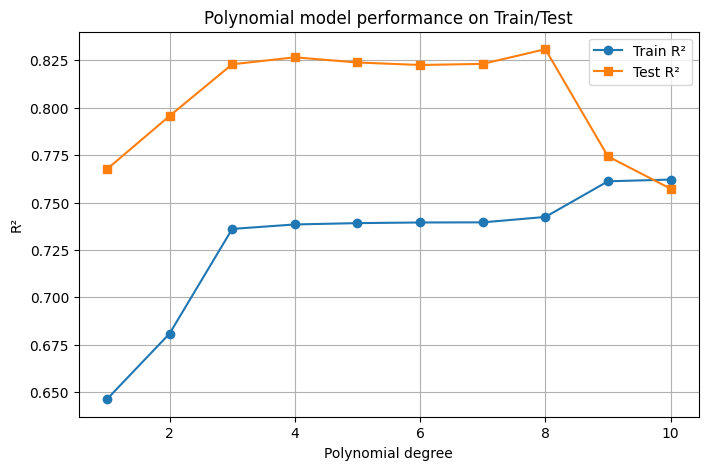

In [6]:
# ------------------------------------------------------------
# 5. Plot performance
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(df_results["Degree"], df_results["R2_train"], marker="o", label="Train R²")
plt.plot(df_results["Degree"], df_results["R2_test"], marker="s", label="Test R²")
plt.xlabel("Polynomial degree")
plt.ylabel("R²")
plt.title("Polynomial model performance on Train/Test")
plt.legend()
plt.grid(True)
plt.show()

CONCLUSIONES:
   * Al incrementar el grado del polinomio del polinomio, el R2 en el conjunto siempre aumenta y se ve que el modelo se ajusta mejor a los datos.
   * En el conjunto de prueba, el R² mejora hasta un grado 8 (0.8308), pero a partir de ahí disminuye, es decir, hay sobreajuste.
   * El grado polinomial óptimo es 8, ya que logra el mejor equilibrio entre ajuste y capacidad de generalización.

============================================================
Exercise 3
============================================================

# 3a Cleaning (2 points)

In this section you'll need to do the following:

- Create a variable area2 that's the square of area (0.25 points)
- Convert 'hasparkingspace', 'hasbalcony', 'haselevator', 'hassecurity', 'hasstorageroom' to dummy variables (where 'yes' 'no' get mapped to 1, 0) (0.75 points)
- For each last digit of area (i.e. 0,1,...,9), create a dummy variable if the last digit of area happens to be that number. Name your variables accordingly (e.g. end_0, end_1, ...end_9). (1 point)

##### Cargar base de datos

In [2]:
import pandas as pd

# If you uploaded apartments.csv to the same working directory:
df = pd.read_csv("/Users/rominarattoyanez/Downloads/apartments.csv")

# Show first rows
print(df.head())

                                 id    price  month  area               type  \
0  a01d82c9529f98a54d64b9e061c9a73b  1199999      1   105  apartmentBuilding   
1  8373aa373dbc3fe7ca3b7434166b8766   650000      1    73           tenement   
2  7d0c31d5409caab173571cce3dcdf702   590000      1    69       blockOfFlats   
3  3eaa36a59b9354206703b5f6b2f2ff1d   584999      1    42       blockOfFlats   
4  027b30cebbc49faf3094421b741ddd56   363000      1    46       blockOfFlats   

   rooms  centredistance  schooldistance  clinicdistance  postofficedistance  \
0      4            5.06           1.080           0.949               0.623   
1      3            3.24           0.275           0.672               0.367   
2      3            3.94           0.139           1.336               0.926   
3      2            5.19           0.209           1.533               0.201   
4      2            1.65           0.250           0.624               0.510   

   ...  restaurantdistance  collegedis

##### Crear area2

In [3]:
df["area2"] = df["area"] ** 2

##### Convertir columnas yes/no a dummies

In [5]:
print(df.columns.tolist())

['id', 'price', 'month', 'area', 'type', 'rooms', 'centredistance', 'schooldistance', 'clinicdistance', 'postofficedistance', 'kindergartendistance', 'restaurantdistance', 'collegedistance', 'pharmacydistance', 'ownership', 'buildingmaterial', 'hasparkingspace', 'hasbalcony', 'haselevator', 'hassecurity', 'hasstorageroom', 'area2']


In [6]:
cols = ["hasparkingspace", "hasbalcony", "haselevator", "hassecurity", "hasstorageroom"]

for c in cols:
    df[c] = df[c].str.lower().map({"yes": 1, "no": 0}) # (.str.lower() lo hace robusto a "Yes"/"YES"/"yes")
                                                       # .map() reemplaza yes por 1, no por 0, y el resto por NaN

##### Create dummy variables for last digit of area

In [7]:
# Get last digit
df["area_last_digit"] = df["area"] % 10 # % es “el residuo de una división entera”.

# Create dummies
for d in range(10):
    df[f"end_{d}"] = (df["area_last_digit"] == d).astype(int)

# Drop helper column if you don’t want it
df = df.drop(columns=["area_last_digit"])

# 3b Linear model estimation (4 points)

1 Regress 'price' against the following covariates:

- Area's last digit dummies (ommit 9 to have a base category)
- Area, area squared
- Distance from apartment to point of interest (such as school, clinic, postoffice, etc.)
'hasparkingspace', 'hasbalcony', 'haselevator', 'hassecurity', 'hasstorageroom'
- Month, type, rooms, ownership, buildingmaterial (treat these as categorical variables)

Print a summary table and comment your results on the area's last digit dummy when the area's last digit is 0 (end_0).

(2 points)

##### Variables de interés

In [9]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

last_digit_dummies = [f"end_{i}" for i in range(9)]  # Quitamos end_9 para que sea la categoría base

# Variables continuas
continuous_vars = ["area", "area2",
                   "schooldistance", "clinicdistance", "postofficedistance",
                   "kindergartendistance", "restaurantdistance",
                   "collegedistance", "pharmacydistance"]

# Variables binarias ya convertidas
binary_vars = ["hasparkingspace", "hasbalcony", "haselevator", "hassecurity", "hasstorageroom"]

# Variables categóricas → usamos C() en fórmula
categorical_vars = ["month", "type", "rooms", "ownership", "buildingmaterial"]

In [11]:
print("Last digit dummies:")
print(last_digit_dummies)

print("\nContinuous variables:")
print(continuous_vars)

print("\nBinary variables:")
print(binary_vars)

print("\nCategorical variables:")
print(categorical_vars)

Last digit dummies:
['end_0', 'end_1', 'end_2', 'end_3', 'end_4', 'end_5', 'end_6', 'end_7', 'end_8']

Continuous variables:
['area', 'area2', 'schooldistance', 'clinicdistance', 'postofficedistance', 'kindergartendistance', 'restaurantdistance', 'collegedistance', 'pharmacydistance']

Binary variables:
['hasparkingspace', 'hasbalcony', 'haselevator', 'hassecurity', 'hasstorageroom']

Categorical variables:
['month', 'type', 'rooms', 'ownership', 'buildingmaterial']


##### Regresión

In [13]:
import statsmodels.formula.api as smf

# Fórmula simple: statsmodels crea dummies automáticamente para las categóricas con C()
model = smf.ols(
    "price ~ area + area2 \
             + schooldistance + clinicdistance + postofficedistance + kindergartendistance + restaurantdistance + collegedistance + pharmacydistance \
             + hasparkingspace + hasbalcony + haselevator + hassecurity + hasstorageroom \
             + C(month) + C(type) + C(rooms) + C(ownership) + C(buildingmaterial) \
             + end_0 + end_1 + end_2 + end_3 + end_4 + end_5 + end_6 + end_7 + end_8",
    data=df
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     2141.
Date:                Sun, 31 Aug 2025   Prob (F-statistic):               0.00
Time:                        20:27:27   Log-Likelihood:            -8.0515e+05
No. Observations:               57285   AIC:                         1.610e+06
Df Residuals:                   57246   BIC:                         1.611e+06
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [18]:
with open("regression_results.txt", "w") as f:
    f.write(model.summary().as_text())

In [16]:
"""
# Forma Corta

formula = (
    "price ~ " 
    + " + ".join(last_digit_dummies + continuous_vars + binary_vars) 
    + " + " 
    + " + ".join([f"C({c})" for c in categorical_vars])
)

model = smf.ols(formula=formula, data=df).fit()

print(model.summary())
"""

'\n# Forma Corta\n\nformula = (\n    "price ~ " \n    + " + ".join(last_digit_dummies + continuous_vars + binary_vars) \n    + " + " \n    + " + ".join([f"C({c})" for c in categorical_vars])\n)\n\nmodel = smf.ols(formula=formula, data=df).fit()\n\nprint(model.summary())\n'

##### Comentario

- El coeficiente de end_0 se interpreta en relación con la categoría base, que es end_9 (departamentos cuyo área termina en 9).
- Signo positivo: los departamentos cuyo área termina en 0 tienen un precio mayor que los que terminan en 9, manteniendo constantes las demás variables del modelo (área, área², distancias, características, tipo de construcción, etc.).
- Magnitud: el precio promedio es ≈ 27,600 (soles) más alto.
- Significancia estadística: el p-valor = 0.000 indica que este efecto es robusto y difícilmente atribuible al azar.

2 Perform the same regression but this time by partialling-out. Your target parameter will be the one associated with end_0. Print a summary table and verify the coefficients are the same with both methods.

(2 points)

In [37]:
from patsy import dmatrices
import statsmodels.api as sm
import numpy as np
import pandas as pd

# MISMA fórmula que tu OLS completo
formula = (
    "price ~ area + area2 "
    "+ schooldistance + clinicdistance + postofficedistance "
    "+ kindergartendistance + restaurantdistance "
    "+ collegedistance + pharmacydistance "
    "+ hasparkingspace + hasbalcony + haselevator + hassecurity + hasstorageroom "
    "+ C(month) + C(type) + C(rooms) + C(ownership) + C(buildingmaterial) "
    "+ end_0 + end_1 + end_2 + end_3 + end_4 + end_5 + end_6 + end_7 + end_8"
)

# 1) Construye Y y X EXACTAMENTE como los usa la fórmula (mismas dummies, misma base, mismas filas)
y_mat, X_mat = dmatrices(formula, data=df, return_type="dataframe")

# 2) OLS completo (referencia)
full = sm.OLS(y_mat, X_mat).fit()
beta_full = full.params["end_0"]
print("Coef (full OLS) end_0:", beta_full)

# 3) Partialling-out usando la MISMA X:
#    W = controles (incluye Intercept), x = columna end_0
W = X_mat.drop(columns=["end_0"])   # ya VIENE con 'Intercept', no agregues otra constante
x = X_mat["end_0"]
y = y_mat.iloc[:, 0]                # columna 'price' como Serie

# Residualiza con los mismos controles W
res_y = sm.OLS(y, W).fit().resid
res_x = sm.OLS(x, W).fit().resid

# Re-regresión de residuos (sin constante)
partial = sm.OLS(res_y, res_x).fit()
beta_partial = partial.params.iloc[0]
print("Coef (partialling-out) end_0:", beta_partial)

# 4) Verificación
print("¿Iguales?:", np.isclose(beta_full, beta_partial, rtol=1e-10, atol=1e-8))


Coef (full OLS) end_0: 27604.1420268837
Coef (partialling-out) end_0: 27604.142026883816
¿Iguales?: True


In [39]:
with open("regression_results_partialling_out.txt", "w") as f:
    f.write(partial.summary().as_text())

# 3c Price premium for area that ends in 0-digit (3 points)

In this section we'll attempt to see if apartments whose area ends at 0 are valued higher than what their features would suggest. Perform the following tasks.



1 Train the model
Estimate the same linear regression model, but only using apartments whose area does not end in 0.
(1.25 points)



In [38]:
import statsmodels.formula.api as smf

# Filtrar: solo observaciones cuyo área NO termina en 0
df_no_end0 = df[df["end_0"] == 0].copy()

# Misma fórmula de antes
formula = (
    "price ~ area + area2 "
    "+ schooldistance + clinicdistance + postofficedistance "
    "+ kindergartendistance + restaurantdistance "
    "+ collegedistance + pharmacydistance "
    "+ hasparkingspace + hasbalcony + haselevator + hassecurity + hasstorageroom "
    "+ C(month) + C(type) + C(rooms) + C(ownership) + C(buildingmaterial) "
    "+ end_1 + end_2 + end_3 + end_4 + end_5 + end_6 + end_7 + end_8"
)

# Ajustar el modelo solo con df_no_end0
model_no_end0 = smf.ols(formula, data=df_no_end0).fit()

print(model_no_end0.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     1944.
Date:                Sun, 31 Aug 2025   Prob (F-statistic):               0.00
Time:                        23:21:44   Log-Likelihood:            -7.1180e+05
No. Observations:               50666   AIC:                         1.424e+06
Df Residuals:                   50628   BIC:                         1.424e+06
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

2 Predict prices
Using the estimated coefficients from step 1, predict apartment prices for the entire sample, including those apartments whose area ends in 0.
(1.25 points)

In [40]:
# Predecir precios para toda la muestra con el modelo entrenado en df_no_end0
df["predicted_price_no_end0"] = model_no_end0.predict(df)

# Revisar algunas predicciones
print(df[["price", "predicted_price_no_end0"]].head(10))

     price  predicted_price_no_end0
0  1199999             1.488268e+06
1   650000             9.157166e+05
2   590000             7.813885e+05
3   584999                      NaN
4   363000             3.986302e+05
5   717000             1.043160e+06
6   689000             8.207167e+05
7   790000             1.173385e+06
8   560000             8.390421e+05
9   590000             6.289689e+05


3 Compare averages
For apartments whose area ends in 0, compute both the average actual price and the average predicted price.
Based on this comparison, try to determine whether apartments with areas ending in 0 are sold at a higher price than what the model predicts. (You don't need to make a statistical tests, just say a guess based on your results)
(0.5 points)

In [41]:
# Filtrar solo los apartamentos cuyo área termina en 0
df_end0 = df[df["end_0"] == 1]

# Calcular promedios
avg_actual = df_end0["price"].mean()
avg_predicted = df_end0["predicted_price_no_end0"].mean()

print("Precio promedio real (end_0 = 1):", avg_actual)
print("Precio promedio predicho (end_0 = 1):", avg_predicted)

# Diferencia
print("Diferencia (real - predicho):", avg_actual - avg_predicted)


Precio promedio real (end_0 = 1): 873616.2969725713
Precio promedio predicho (end_0 = 1): 876881.8195282582
Diferencia (real - predicho): -3265.5225556868827


##### Comentario

Como el promedio real < promedio predicho → en realidad se venden más baratos de lo esperado.